# Keras Image Application - Ensemble

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101

In [32]:
from google.colab import files
up=files.upload()

Saving animals.zip to animals.zip


In [33]:
!unzip animals.zip -d animals

Archive:  animals.zip
  inflating: animals/bear.jpg        
  inflating: animals/crocodile.jpg   
  inflating: animals/dolphin.jpg     
  inflating: animals/eagle.jpg       
  inflating: animals/elephant.jpg    
  inflating: animals/hawk.jpg        
  inflating: animals/lion.jpg        
  inflating: animals/penguin.jpg     
  inflating: animals/shark.jpg       
  inflating: animals/sparrow.jpg     


In [4]:
up=files.upload()

Saving image_util.py to image_util.py


In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

In [8]:
vgg16 = VGG16()
vgg19 = VGG19()
resnet50 = ResNet50()
resnet101 = ResNet101()

179658752/179648224 [==============================] - 1s 0us/step


In [27]:
from image_util import center_image

In [34]:
lines = []
for fname in glob('animals/*.jpg'):
    name = fname.split('/')[1].split('.')[0]
    img = center_image(Image.open(fname), src_format='Pillow')
    yhat_vgg16 = vgg16.predict(img.reshape(1,224,224,3))
    yhat_vgg19 = vgg19.predict(img.reshape(1,224,224,3))
    yhat_resnet50 = resnet50.predict(img.reshape(1,224,224,3))
    yhat_resnet101 = resnet101.predict(img.reshape(1,224,224,3))
    yhat_en = (yhat_vgg16 +yhat_vgg19 + yhat_resnet50+ yhat_resnet101) / 4

    pred_vgg16 = decode_predictions(yhat_vgg16)
    pred_vgg19 = decode_predictions(yhat_vgg16)
    pred_resnet50 = decode_predictions(yhat_resnet50)
    pred_resnet101 = decode_predictions(yhat_resnet101)
    pred_en = decode_predictions(yhat_en)

    lines.append([name, pred_vgg16, pred_vgg19, pred_resnet50, pred_resnet101, pred_en])

In [35]:
import pandas as pd

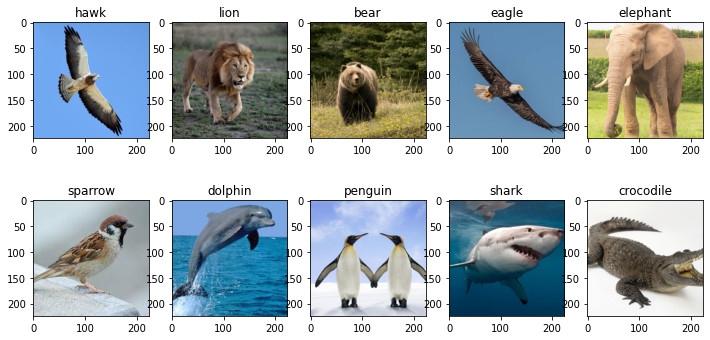

In [36]:
plt.figure(figsize=(12,6))
for i, fname in enumerate(glob('animals/*.jpg')):
    plt.subplot(2,5,i+1)
    plt.imshow(center_image(Image.open(fname), src_format='Pillow', dst_format='Pillow'))
    plt.title(fname.split('/')[1].split('.')[0])

In [37]:
df = pd.DataFrame(lines, columns=['Name', 'VGG16', 'VGG19', "RESNet50", 'RESNet101', 'Ensemble'])
df

,Name,VGG16,VGG19,RESNet50,RESNet101,Ensemble
0,hawk,"[[(n01608432, kite, 0.9750803), (n01817953, Af...","[[(n01608432, kite, 0.9750803), (n01817953, Af...","[[(n04153751, screw, 0.7957402), (n01608432, k...","[[(n01608432, kite, 0.9949227), (n03804744, na...","[[(n01608432, kite, 0.7894723), (n04153751, sc..."
1,lion,"[[(n02129165, lion, 0.9994261), (n02487347, ma...","[[(n02129165, lion, 0.9994261), (n02487347, ma...","[[(n02129165, lion, 0.89781475), (n02090721, I...","[[(n02129165, lion, 0.4725893), (n02127052, ly...","[[(n02129165, lion, 0.8358539), (n02127052, ly..."
2,bear,"[[(n02132136, brown_bear, 0.44639897), (n02137...","[[(n02132136, brown_bear, 0.44639897), (n02137...","[[(n02134084, ice_bear, 0.6684148), (n02132136...","[[(n02132136, brown_bear, 0.67419195), (n02134...","[[(n02134084, ice_bear, 0.43303692), (n0213213..."
3,eagle,"[[(n01608432, kite, 0.41255176), (n01614925, b...","[[(n01608432, kite, 0.41255176), (n01614925, b...","[[(n01608432, kite, 0.4101753), (n01873310, pl...","[[(n01608432, kite, 0.82026964), (n01616318, v...","[[(n01608432, kite, 0.54851025), (n01614925, b..."
4,elephant,"[[(n02504458, African_elephant, 0.7254546), (n...","[[(n02504458, African_elephant, 0.7254546), (n...","[[(n02504458, African_elephant, 0.84964997), (...","[[(n02504458, African_elephant, 0.92786455), (...","[[(n02504458, African_elephant, 0.8290899), (n..."
5,sparrow,"[[(n01806567, quail, 0.547157), (n01601694, wa...","[[(n01806567, quail, 0.547157), (n01601694, wa...","[[(n01592084, chickadee, 0.22545667), (n015305...","[[(n01580077, jay, 0.24221103), (n01537544, in...","[[(n01580077, jay, 0.3365959), (n01806567, qua..."
6,dolphin,"[[(n02074367, dugong, 0.29670152), (n01494475,...","[[(n02074367, dugong, 0.29670152), (n01494475,...","[[(n01494475, hammerhead, 0.13080862), (n02071...","[[(n01494475, hammerhead, 0.3215177), (n020923...","[[(n01494475, hammerhead, 0.23628336), (n02074..."
7,penguin,"[[(n02056570, king_penguin, 0.9998809), (n0207...","[[(n02056570, king_penguin, 0.9998809), (n0207...","[[(n02056570, king_penguin, 0.99936765), (n018...","[[(n02056570, king_penguin, 0.9993026), (n0182...","[[(n02056570, king_penguin, 0.9996352), (n0182..."
8,shark,"[[(n01484850, great_white_shark, 0.7997865), (...","[[(n01484850, great_white_shark, 0.7997865), (...","[[(n01484850, great_white_shark, 0.8666344), (...","[[(n01484850, great_white_shark, 0.923606), (n...","[[(n01484850, great_white_shark, 0.89385754), ..."
9,crocodile,"[[(n01687978, agama, 0.2881476), (n01697457, A...","[[(n01687978, agama, 0.2881476), (n01697457, A...","[[(n01698640, American_alligator, 0.8344411), ...","[[(n01698640, American_alligator, 0.25878313),...","[[(n01698640, American_alligator, 0.46024466),..."
